## This notebook is going to be a more in-depth analysis of the San Diego Padres (after some prompting by my friends at inewsource!). I plan to go back as far as the 2010 season, which was the most recent "good" or competitive team. I plan on looking at the makeup of the roster that year, comparing player performance to their individual historical averages, while hopefully mixing in the previously explored empirical Bayes concepts. Since 2010, the Padres have not been very competitive. My aim is to attempt to gain some insight into what internal factors (namely roster construction) could impact the performance of the team from year to year. 

In [1]:
# The usual imports 
%load_ext watermark
#This one is new - a cool magic extension from all-around good guy Seb Raschka
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%watermark -v -m -p numpy,pandas,matplotlib

CPython 3.5.2
IPython 5.1.0

numpy 1.11.3
pandas 0.19.2
matplotlib 2.0.0

compiler   : GCC 4.2.1 Compatible Apple LLVM 4.2 (clang-425.0.28)
system     : Darwin
release    : 16.7.0
machine    : x86_64
processor  : i386
CPU cores  : 8
interpreter: 64bit


In [3]:
#Load the Lahman database...
Lahman_2016_bat = pd.read_csv('./Lahman-2016/core/Batting.csv')
Lahman_2016_pit = pd.read_csv('./Lahman-2016/core/Pitching.csv')

In [4]:
Lahman_2016_bat.head(10)

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,abercda01,1871,1,TRO,NaN,1,4,0,0,0,...,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,NaN
1,addybo01,1871,1,RC1,NaN,25,118,30,32,6,...,13.0,8.0,1.0,4,0.0,NaN,NaN,NaN,NaN,NaN
2,allisar01,1871,1,CL1,NaN,29,137,28,40,4,...,19.0,3.0,1.0,2,5.0,NaN,NaN,NaN,NaN,NaN
3,allisdo01,1871,1,WS3,NaN,27,133,28,44,10,...,27.0,1.0,1.0,0,2.0,NaN,NaN,NaN,NaN,NaN
4,ansonca01,1871,1,RC1,NaN,25,120,29,39,11,...,16.0,6.0,2.0,2,1.0,NaN,NaN,NaN,NaN,NaN
5,armstbo01,1871,1,FW1,NaN,12,49,9,11,2,...,5.0,0.0,1.0,0,1.0,NaN,NaN,NaN,NaN,NaN
6,barkeal01,1871,1,RC1,NaN,1,4,0,1,0,...,2.0,0.0,0.0,1,0.0,NaN,NaN,NaN,NaN,NaN
7,barnero01,1871,1,BS1,NaN,31,157,66,63,10,...,34.0,11.0,6.0,13,1.0,NaN,NaN,NaN,NaN,NaN
8,barrebi01,1871,1,FW1,NaN,1,5,1,1,1,...,1.0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,NaN
9,barrofr01,1871,1,BS1,NaN,18,86,13,13,2,...,11.0,1.0,0.0,0,0.0,NaN,NaN,NaN,NaN,NaN


In [5]:
Lahman_2016_pit.head(10)

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,...,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
0,bechtge01,1871,1,PH1,NaN,1,2,3,3,2,...,NaN,NaN,NaN,0,NaN,NaN,42,NaN,NaN,NaN
1,brainas01,1871,1,WS3,NaN,12,15,30,30,30,...,NaN,NaN,NaN,0,NaN,NaN,292,NaN,NaN,NaN
2,fergubo01,1871,1,NY2,NaN,0,0,1,0,0,...,NaN,NaN,NaN,0,NaN,NaN,9,NaN,NaN,NaN
3,fishech01,1871,1,RC1,NaN,4,16,24,24,22,...,NaN,NaN,NaN,0,NaN,NaN,257,NaN,NaN,NaN
4,fleetfr01,1871,1,NY2,NaN,0,1,1,1,1,...,NaN,NaN,NaN,0,NaN,NaN,21,NaN,NaN,NaN
5,flowedi01,1871,1,TRO,NaN,0,0,1,0,0,...,NaN,NaN,NaN,0,NaN,NaN,0,NaN,NaN,NaN
6,mackde01,1871,1,RC1,NaN,0,1,3,1,1,...,NaN,NaN,NaN,0,NaN,NaN,30,NaN,NaN,NaN
7,mathebo01,1871,1,FW1,NaN,6,11,19,19,19,...,NaN,NaN,NaN,2,NaN,NaN,243,NaN,NaN,NaN
8,mcbridi01,1871,1,PH1,NaN,18,5,25,25,25,...,NaN,NaN,NaN,0,NaN,NaN,223,NaN,NaN,NaN
9,mcmuljo01,1871,1,TRO,NaN,12,15,29,29,28,...,NaN,NaN,NaN,0,NaN,NaN,362,NaN,NaN,NaN


In [6]:
Lahman_2016_bat['teamID'].unique() #This will show me all of the unique team identifiers, just to find which one I need..

array(['TRO', 'RC1', 'CL1', 'WS3', 'FW1', 'BS1', 'PH1', 'CH1', 'NY2',
       'MID', 'BR1', 'BR2', 'WS4', 'BL1', 'PH2', 'ELI', 'WS5', 'BL4',
       'HR1', 'CH2', 'PH3', 'WS6', 'NH1', 'KEO', 'SL2', 'SL1', 'CHN',
       'LS1', 'HAR', 'SL3', 'NY3', 'PHN', 'CN1', 'BSN', 'PRO', 'ML2',
       'IN1', 'SR1', 'CL2', 'TRN', 'BFN', 'WOR', 'DTN', 'PT1', 'PH4',
       'LS2', 'BL2', 'SL4', 'CN2', 'NY1', 'PHI', 'NY4', 'CL5', 'WSU',
       'KCU', 'TL1', 'CHU', 'BLU', 'IN2', 'PHU', 'WIL', 'SLU', 'MLU',
       'CNU', 'SPU', 'WS7', 'BR3', 'ALT', 'BSU', 'RIC', 'SL5', 'KCN',
       'WS8', 'CL3', 'IN3', 'PIT', 'KC2', 'CL4', 'CL6', 'TL2', 'BRP',
       'CLP', 'BL3', 'CIN', 'BRO', 'BFP', 'CHP', 'RC2', 'SR2', 'PTP',
       'BR4', 'BSP', 'NYP', 'PHP', 'ML3', 'WS9', 'CN3', 'BS2', 'WAS',
       'LS3', 'SLN', 'BLN', 'MLA', 'CLE', 'PHA', 'DET', 'BOS', 'CHA',
       'BLA', 'WS1', 'SLA', 'NYA', 'KCF', 'PTF', 'BUF', 'BLF', 'BRF',
       'CHF', 'IND', 'SLF', 'NEW', 'ML1', 'BAL', 'KC1', 'SFN', 'LAN',
       'MIN', 'LAA',

In [7]:
SD_Teams = [name for name in Lahman_2016_bat['teamID'].unique() if 'SD' in name]

In [8]:
SD_Teams

['SDN']

Using my super sleuthing skills, I discovered that the only team ID with "SD" (San Diego) in it is "SDN" I can now pare down my dataframes using this teamID.

In [9]:
SD_bat = Lahman_2016_bat[Lahman_2016_bat['teamID'] == "SDN"]
SD_bat.head()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
47265,arciajo01,1969,1,SDN,NL,120,302,35,65,11,...,10.0,14.0,7.0,14,47.0,0.0,2.0,3.0,0.0,7.0
47266,arlinst01,1969,1,SDN,NL,4,2,0,0,0,...,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0
47276,baldsja01,1969,1,SDN,NL,61,4,0,1,0,...,0.0,0.0,0.0,1,3.0,0.0,0.0,0.0,0.0,0.0
47346,brownol02,1969,1,SDN,NL,151,568,76,150,18,...,61.0,10.0,6.0,44,97.0,3.0,3.0,4.0,2.0,12.0
47370,cannich01,1969,1,SDN,NL,134,418,23,92,14,...,33.0,0.0,1.0,42,81.0,8.0,0.0,7.0,2.0,16.0


In [10]:
SD_pit = Lahman_2016_pit[Lahman_2016_pit['teamID'] == "SDN"]
SD_pit.head()

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,...,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
18786,arlinst01,1969,1,SDN,NL,0,1,4,1,0,...,1.0,5.0,0.0,0,54.0,2.0,11,NaN,NaN,NaN
18789,baldsja01,1969,1,SDN,NL,7,2,61,0,0,...,6.0,7.0,2.0,0,340.0,24.0,45,NaN,NaN,NaN
18846,corkimi01,1969,1,SDN,NL,1,3,6,4,0,...,1.0,1.0,0.0,0,86.0,0.0,17,NaN,NaN,NaN
18870,dukesto01,1969,1,SDN,NL,1,0,13,0,0,...,2.0,2.0,0.0,0,101.0,7.0,18,NaN,NaN,NaN
18878,everile01,1969,1,SDN,NL,0,1,5,0,0,...,1.0,0.0,1.0,0,75.0,0.0,14,NaN,NaN,NaN


Now I have dataframes of only Padres players, going back to their first year in the major league. These dataframes will definitely come in handy at some point. For now, I need to continue to trim these down to the 2010 season, or maybe 2010 and the year following. Time to brainstorm what exactly I want to do next. 

In [11]:
SD_bat = SD_bat.assign(Avg=SD_bat['H'] / SD_bat['AB'])

In [12]:
SD_bat.head()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,Avg
47265,arciajo01,1969,1,SDN,NL,120,302,35,65,11,...,14.0,7.0,14,47.0,0.0,2.0,3.0,0.0,7.0,0.215232
47266,arlinst01,1969,1,SDN,NL,4,2,0,0,0,...,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000
47276,baldsja01,1969,1,SDN,NL,61,4,0,1,0,...,0.0,0.0,1,3.0,0.0,0.0,0.0,0.0,0.0,0.250000
47346,brownol02,1969,1,SDN,NL,151,568,76,150,18,...,10.0,6.0,44,97.0,3.0,3.0,4.0,2.0,12.0,0.264085
47370,cannich01,1969,1,SDN,NL,134,418,23,92,14,...,0.0,1.0,42,81.0,8.0,0.0,7.0,2.0,16.0,0.220096


In [13]:
Padres_2010_bat = SD_bat[SD_bat['yearID'] == 2010]

In [14]:
Padres_2010_bat.fillna(0, inplace=True)

/Users/charlierock/anaconda/envs/py35/lib/python3.5/site-packages/pandas/core/frame.py:2842: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [15]:
Padres_2010_bat.isnull().sum()

playerID    0
yearID      0
stint       0
teamID      0
lgID        0
G           0
AB          0
R           0
H           0
2B          0
3B          0
HR          0
RBI         0
SB          0
CS          0
BB          0
SO          0
IBB         0
HBP         0
SH          0
SF          0
GIDP        0
Avg         0
dtype: int64

In [16]:
Padres_2011_bat = SD_bat[SD_bat['yearID'] == 2011]
# I want to compare how similar the 2011 team was to the 2010 team. 

In [17]:
Padres_2011_bat.fillna(0, inplace=True)

/Users/charlierock/anaconda/envs/py35/lib/python3.5/site-packages/pandas/core/frame.py:2842: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [18]:
Padres_2011_bat.describe()

,yearID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,Avg
count,48.0,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.00000,48.000000,48.000000,48.00000,48.000000
mean,2011.0,1.062500,49.062500,112.854167,12.354167,26.750000,5.145833,0.875000,1.895833,11.729167,3.541667,0.916667,10.437500,27.500000,0.875000,1.00000,1.145833,0.979167,2.18750,0.142921
std,0.0,0.244623,38.064003,149.003069,19.371496,38.986905,7.629700,1.733586,2.976787,16.528170,8.042330,2.061123,14.589279,32.893768,1.658312,1.44399,1.879221,1.522730,3.08501,0.110905
min,2011.0,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000
25%,2011.0,1.000000,19.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000
50%,2011.0,1.000000,43.500000,44.500000,3.000000,8.000000,1.000000,0.000000,0.000000,3.000000,0.000000,0.000000,3.000000,17.000000,0.000000,0.00000,0.000000,0.000000,0.50000,0.177124
75%,2011.0,1.000000,64.750000,172.250000,13.500000,35.250000,8.250000,1.000000,3.000000,16.750000,2.000000,1.000000,14.500000,43.750000,1.000000,1.25000,1.250000,1.250000,3.00000,0.229751
max,2011.0,2.000000,139.000000,554.000000,82.000000,136.000000,28.000000,8.000000,11.000000,64.000000,40.000000,10.000000,52.000000,125.000000,8.000000,5.00000,7.000000,6.000000,13.00000,0.363636


In [19]:
played_2010 = list(Padres_2010_bat['playerID'])
played_2011 = list(Padres_2011_bat['playerID'])

In [20]:
left_team = [p for p in played_2010 if p not in played_2011]
new_in_2011 = [n for n in played_2011 if n not in played_2010]

In [21]:
print(left_team)
print(new_in_2011)

['baxtemi01', 'correke01', 'duranlu01', 'eckstda01', 'gallase01', 'garlajo01', 'gonzaad01', 'gwynnto02', 'hairsje02', 'hairssc01', 'mujiced01', 'perdolu01', 'ramosce01', 'russead01', 'salazos01', 'stairma01', 'stewach01', 'tejadmi01', 'torreyo01', 'webbry01', 'youngch03', 'zawadla01']
['bartlja01', 'bassan01', 'brachbr01', 'cantujo01', 'carpean01', 'darneja01', 'dedunsa01', 'forsylo01', 'fulchje01', 'gonzaal03', 'guzmaje01', 'hamreer01', 'haranaa01', 'hawpebr01', 'hermije01', 'hudsoor01', 'huntece01', 'johnsro07', 'martilu02', 'maybica01', 'moseldu01', 'neshepa01', 'parrian01', 'patteer01', 'phillky01', 'quallch01', 'rizzoan01', 'scribev01', 'spencjo01', 'tekotbl01']


In [22]:
new_2011_bat = Padres_2011_bat[Padres_2011_bat['playerID'].isin(new_in_2011)]

In [23]:
all_hitters_2011 = Lahman_2016_bat[Lahman_2016_bat['yearID']==2011]
exited_2011 = all_hitters_2011[all_hitters_2011['playerID'].isin(left_team)]
exited_2011 = exited_2011.assign(Avg=exited_2011['H'] / exited_2011['AB'])
exited_2011.fillna(0, inplace=True)

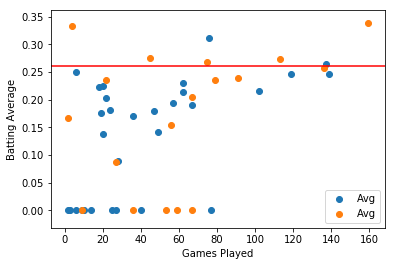

In [24]:
fig, ax = plt.subplots()
plt.scatter(new_2011_bat['G'], new_2011_bat['Avg'])
plt.scatter(exited_2011['G'], exited_2011['Avg'])
plt.axhline(y=0.26, color='r', linestyle='-')
ax.legend(loc=0);
ax.set_xlabel('Games Played')
ax.set_ylabel('Batting Average')
plt.show()

### The above plot shows players new to the team in 2011 in blue, and players who left the team in orange. There's not a lot of insight to be gained here, except for one player who left and had a stellar year. Let's see if we can figure out who that was. The red line highlights a .260 batting average, which is what my empirical Bayes model would predict for any given player without regard to past performance. 

In [25]:
exited_2011.sort_values('Avg', ascending=False)

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,Avg
94670,gonzaad01,2011,1,BOS,AL,159,630,108,213,45,...,1.0,0.0,74,119.0,20.0,6.0,0.0,5.0,28.0,0.338095
95580,youngch03,2011,1,NYN,NL,4,9,1,3,0,...,0.0,0.0,0,4.0,0.0,0.0,2.0,0.0,0.0,0.333333
94708,hairsje02,2011,2,MIL,NL,45,124,18,34,10,...,1.0,0.0,11,16.0,0.0,3.0,0.0,0.0,4.0,0.274194
95463,torreyo01,2011,1,TEX,AL,113,396,40,108,27,...,0.0,2.0,20,65.0,0.0,0.0,1.0,2.0,11.0,0.272727
94707,hairsje02,2011,1,WAS,NL,75,213,25,57,11,...,2.0,2.0,22,30.0,1.0,2.0,1.0,0.0,3.0,0.267606
94703,gwynnto02,2011,1,LAN,NL,136,312,37,80,12,...,22.0,6.0,23,61.0,1.0,1.0,2.0,2.0,2.0,0.256410
95436,tejadmi01,2011,1,SFN,NL,91,322,28,77,16,...,4.0,4.0,12,35.0,5.0,3.0,2.0,4.0,10.0,0.239130
94273,baxtemi01,2011,1,NYN,NL,22,34,6,8,2,...,0.0,0.0,5,9.0,0.0,1.0,0.0,0.0,1.0,0.235294
94709,hairssc01,2011,1,NYN,NL,79,132,20,31,8,...,1.0,1.0,11,34.0,2.0,2.0,0.0,0.0,2.0,0.234848
95401,stewach01,2011,1,SFN,NL,67,162,20,33,8,...,0.0,0.0,16,18.0,4.0,2.0,3.0,0.0,2.0,0.203704


### Well, no surprise here, that player was indeed Adrian Gonzalez, who was a star player in the league at the time. He was traded to the Red Sox (boo) in 2010, and had a great season in Boston in 2011. 

Next up, I think I want to apply empirical Bayes techniques to these groups of players to attempt to predict how they'd perform in 2011. Once I have predicted performance measures for some of the common stats, I can compare those numbers to their actual performance, testing the model. After that, I hope to see whether there were some players the Padres should have tried to hold on to, based on value (using contract data), or other metrics. 

# Things to consider doing: 
* Creating a list of only the desired columns
* Creating functions out of the work I did in empirical Bayes
* Dumping those functions into a "utils.py" type file for loading and calling
* Making some functions for the basic chopping up and extracting desired subsets of the giant Lahman dataset. 

### Next up, I'm going to create a column in the 2010 dataframe for WOBA and WRC+ using the formulas that have been developed. There are a few constants that are needed and for 2010, they are:
* R/PA: .115
* League RC: 11155
* League PA: 93061
* wOBA Scale: 1.251
* League wOBA: .321
* Park Factor: .92

wOBA = (.69*uBB+.72*HBP+.89*1B+1.27*2B+1.62*3B+2.10*HR)/(AB+BB-IBB+SF+HBP)

WRC+ = ((((PwOBA-LwOBA)/wOBA Scale)+League R/PA)+(League R/PA-Park Factor * League R/PA))/(NL wRC/PA))*100